# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# Возьмем распределение (Непрерывная случайная величина Лапласа.) https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.laplace.html#scipy.stats.laplace
rv = laplace()
sample = rv.rvs(100)
sample

array([-2.30260543e+00,  9.14920353e-01,  1.87147842e+00, -1.77156208e-01,
       -2.46592903e-02,  4.74953458e-02,  8.35055962e-01,  1.39665661e+00,
       -3.79591415e-01, -1.76559952e+00, -5.05266059e-01,  8.55214715e-01,
       -1.25163431e+00,  1.59574616e-01,  4.95634409e-01, -7.28593199e-01,
        1.05544084e+00,  4.03119973e+00, -2.52333562e+00, -3.35188344e-02,
       -1.13286616e+00,  3.88031758e-01, -2.52052778e+00,  2.18439850e-01,
       -9.65421859e-01,  7.13795964e-01, -6.35304768e-01, -7.36363536e-01,
        8.42697705e-02,  1.44683338e+00, -1.26912375e+00,  3.14838382e-02,
        1.38495587e-01,  6.39369084e-01, -1.08296390e-01, -9.37141911e-01,
        4.92828081e+00,  2.15709221e-01,  1.98437322e-01,  2.11174304e+00,
       -1.11544231e+00, -4.42611564e-01, -2.62392615e+00, -1.18938080e+00,
        4.43110001e-01,  3.12121643e+00,  4.03434842e-01,  1.16395683e+00,
       -1.65617076e+00, -2.12885550e+00, -5.13079942e+00, -1.00353289e+00,
        2.02657810e+00, -

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = rv.mean() # настоящее среднее случайной величины
real_mean

0.0

In [5]:
real_var = rv.var() # настоящая дисперсия случайной величины
real_var

2.0

### Постройте гистограмму выборки и теоретическую плотность распределения

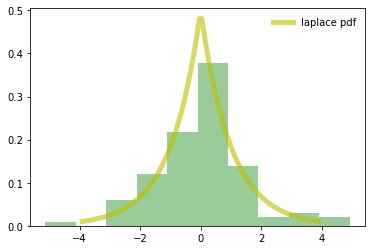

In [6]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(laplace.ppf(0.01),
                laplace.ppf(0.99), 100)
ax.plot(x, laplace.pdf(x),
       'y-', lw=5, alpha=0.6, label='laplace pdf')
ax.hist(sample, density=True, histtype='stepfilled', alpha=0.4, color='g')
ax.legend(loc='best', frameon=False)
plt.show()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print("Выборочное среднее - " ,sample_mean)
sample_var = sample.var() # выборочная дисперсия
print("Выборочная дисперсия - "  , sample_var)

Выборочное среднее -  0.02401435129191258
Выборочная дисперсия -  2.0829792628056403


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

[]

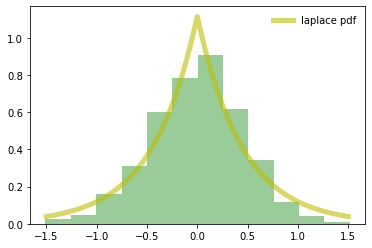

In [8]:
N = 10
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(rv.rvs(N)))
    
means = np.array(means).astype(np.float32)
real_rv = laplace(loc=rv.mean(), scale=rv.std() / np.sqrt(N))
plt.hist(means,bins=12, density=True,alpha=0.4, color='g') 
x = np.linspace(-1.5,1.5, 1000)
pdf = real_rv.pdf(x)
plt.plot(x, pdf, 'y-', lw=5, alpha=0.6, label='laplace pdf')
plt.legend(loc='best', frameon=False)
plt.plot()

[]

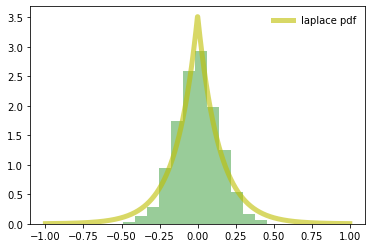

In [9]:
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(rv.rvs(N)))
    
means = np.array(means).astype(np.float32)
real_rv = laplace(loc=rv.mean(), scale=rv.std() / np.sqrt(N))
plt.hist(means,bins=12, density=True,alpha=0.4, color='g') 
x = np.linspace(-1,1, 1000)
pdf = real_rv.pdf(x)
plt.plot(x, pdf, 'y-', lw=5, alpha=0.6, label='laplace pdf')
plt.legend(loc='best', frameon=False)
plt.plot()

[]

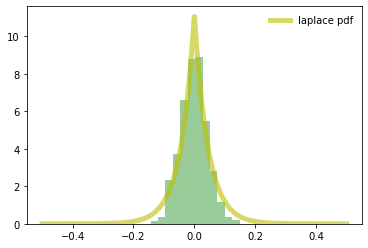

In [10]:
N = 1000
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(rv.rvs(N)))
    
means = np.array(means).astype(np.float32)
real_rv = laplace(loc=rv.mean(), scale=rv.std() / np.sqrt(N))
plt.hist(means,bins=12, density=True,alpha=0.4, color='g') 
x = np.linspace(-0.5,0.5, 1000)
pdf = real_rv.pdf(x)
plt.plot(x, pdf, 'y-', lw=5, alpha=0.6, label='laplace pdf')
plt.legend(loc='best', frameon=False)
plt.plot()

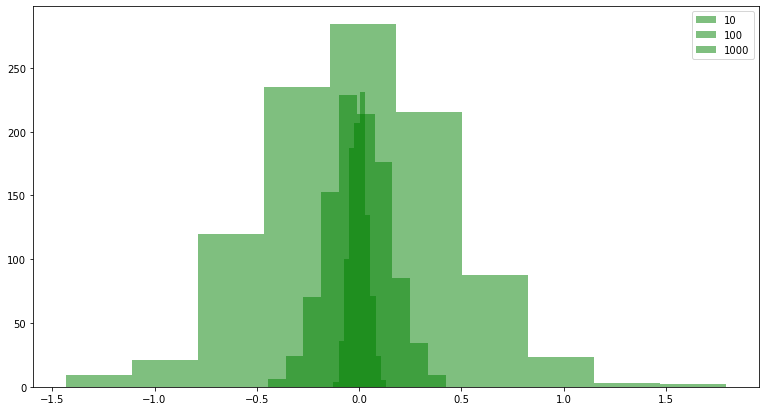

In [11]:
plt.figure(figsize=(13,7))
# сгенерируем много выборочных средних
colors = ['g']

for N in [10, 100,1000]:
    means = []
    for i in range(1000):
         means.append(np.mean(rv.rvs(N)))   
    plt.hist(means, alpha=0.5, color=colors)
    
    
plt.legend(['10', '100', '1000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Считаю, что для распределения (Непрерывная случайная величина Лапласа) апроксимация распределения выборочного среднего работает хорошо при достаточно больших значениях N (>50).  Как видно из графиков, при N =10, апроксимация сработала плохо. 

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [12]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [13]:
from statsmodels.stats.weightstats import _zconfint_generic
import statsmodels.stats.weightstats as ssw

In [14]:
df_new = df[['total day calls','churn']]
df_new.groupby('churn')['total day calls'].mean()

churn
False    100.283158
True     101.335404
Name: total day calls, dtype: float64

In [15]:
A_min=df_new.groupby('churn')['total day calls'].mean() - 2 * df_new.groupby('churn')['total day calls'].std()/ np.sqrt(N)
A_max=df_new.groupby('churn')['total day calls'].mean() + 2 * df_new.groupby('churn')['total day calls'].std()/ np.sqrt(N)
B=ssw._zconfint_generic(df_new.groupby('churn')['total day calls'].mean(),
                      df_new.groupby('churn')['total day calls'].std(), alpha=0.95, alternative='two-sided')

In [17]:
print("Доверительный интервал для среднего среднего значения total day calls по цпт, churn False: [{}, {}] ".format(
    A_min[0],A_max[0]))
print("Доверительный интервал для среднего среднего значения total day calls по цпт, churn True: [{}, {}] ".format(
    A_min[1],A_max[1]))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic, churn False: [{}, {}] ".format(
    B[0][0],B[1][0]))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic, churn True: [{}, {}] ".format(
    B[0][1],B[1][1]))

Доверительный интервал для среднего среднего значения total day calls по цпт, churn False: [99.0308227692532, 101.53549302022049] 
Доверительный интервал для среднего среднего значения total day calls по цпт, churn True: [99.97041876761209, 102.70038868580407] 
Доверительный интервал для среднего по цпт методом _zconfint_generic, churn False: [99.04149114274126, 101.52482464673243] 
Доверительный интервал для среднего по цпт методом _zconfint_generic, churn True: [99.98204678079553, 102.68876067262063] 


**Вывод**: доверительный интервал по оценке среднего с использованием явной формулы для z интервала отличается от той же оценки , но с использованием функции  _zconfint_generic незначительно (0,01)